# Project 3 Part 1
## Chicago Crime Data

*Christina Brockway*

In [1]:
#!pip install holidays

use a prepared zip file with the Chicago Crime Data:
https://drive.google.com/file/d/1avxUlCAros-R9GF6SKXqM_GopzO7VwA5/view?usp=drive_link

**Original Source is the Chicago Data Portal: Crimes 2001 to Present**

**Data Description**
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data

-  includes type of crime, exact data/time, lat/long, District/ward, was there an arrest,....

### Data Dictionary

Taken from: data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"><span style="font-weight:bold">**Name**</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">**dtype**</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">**Description**</span></th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">ID</td>
    <td class="tg-0pky">int64</td>
    <td class="tg-0pky">Unique identifier for the record</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">object</td>
    <td class="tg-0pky">Date incident occured</td>
    <td class="tg-0pky">date/time</td>
  </tr>
  <tr>
    <td class="tg-0pky">Primary Type</td>
    <td class="tg-0pky">object</td>
    <td class="tg-0pky">Primary description of the IL Uniform Crime Reporting code</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Description</td>
    <td class="tg-0pky">object </td>
    <td class="tg-0pky">Secondary description of IUCR code</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Location Description</td>
    <td class="tg-0pky">object </td>
    <td class="tg-0pky">Location where incident occurred</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Arrest</td>
    <td class="tg-0pky">bool</td>
    <td class="tg-0pky">was an arrest made? </td>
    <td class="tg-0pky">true/false</td>
  </tr>
  <tr>
    <td class="tg-0pky">Domestic</td>
    <td class="tg-0pky">bool</td>
    <td class="tg-0pky">was the incident domestic related? </td>
    <td class="tg-0pky">true/false</td>
  </tr>
  <tr>
    <td class="tg-0pky">Beat</td>
    <td class="tg-0pky">int64</td>
    <td class="tg-0pky">beat where occured, Beat: smallest geo area deidcate police beat car</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">District</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">indicates district where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ward</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">indicates city council district/ward where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Latitude</td>
    <td class="tg-0pky">float64 </td>
    <td class="tg-0pky">latitude where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Longitude</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">longitude where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
</tbody>
</table>

# Task:
Answer a series of question s about trends in crimes in Chicago for a reporter for a local newspaper.

-  Pick 3 topics to analyze:
  ~  Comparing Police Districts
  ~  Crimes Across the Years
  ~  Comparing AM vs PM Rush Hour
  ~  Comparing Months
  ~  Comparing Holidays
  ~  What cycles(seasonality) can you find this data


### Imports

In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import datetime as dt
import statsmodels.tsa.api as tsa

import holidays
from holidays import country_holidays

In [3]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

### Load Data

In [4]:
folder = "data/*Crime*.csv"
crime_files = sorted(glob.glob(folder, recursive=True))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [6]:
dff = df.copy()

In [7]:
#Set format for datetime and change dtype
date_format = "%m/%d/%Y %H:%M:%S %p"

dff['Datetime'] = pd.to_datetime(df['Date'], format=date_format)
dff = dff.sort_values('Datetime')
dff

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,2022-12-31 12:50:00
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,2022-12-31 12:50:00
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,2022-12-31 12:52:00
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,2022-12-31 12:52:00


In [8]:
#Adding date columns for easy grouping
dff['time_hour'] = dff['Datetime'].dt.time
dff['month'] = dff['Datetime'].dt.month
dff['year'] = dff['Datetime'].dt.year
dff.head(2)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime,time_hour,month,year
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00,01:00:00,1,2001
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00,01:00:00,1,2001


In [9]:
#Set index column to datetime
dff=dff.set_index('Datetime')
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 15 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
 12  time_hour             object 
 13  month                 int64  
 14  year                  int64  
dtypes: bool(2), float64(4), int64(4), object(5)
memory usage: 838.6+ MB


In [10]:
#Check for null values
dff.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10928
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Latitude                 88685
Longitude                88685
time_hour                    0
month                        0
year                         0
dtype: int64

## Comparing Crimes Across the Years

- isolate columns for years
- .count for total number of crimes
- make a visualiztion of the crimes
                 

In [11]:
crimes_by_year = dff[['year', 'ID']]
crimes_by_year.head(2)

,year,ID
Datetime,,
2001-01-01 01:00:00,2001,1326041
2001-01-01 01:00:00,2001,1317937


In [12]:
total_crimes_by_year= crimes_by_year.groupby('year').count()
total_crimes_by_year.head()

,ID
year,
2001,485886
2002,486807
2003,475985
2004,469422
2005,453773


<Figure size 1200x500 with 0 Axes>

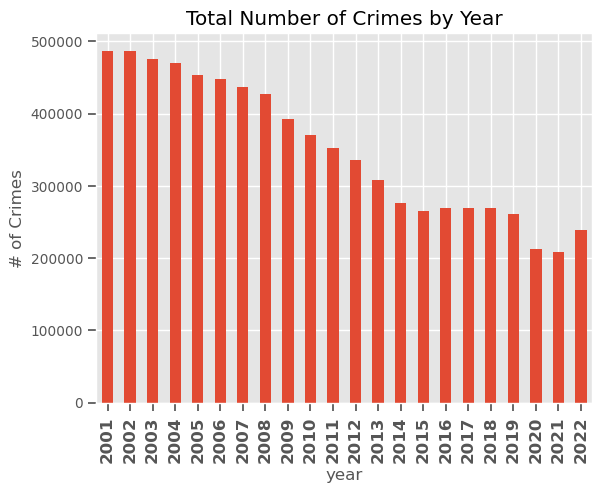

In [13]:
ax = plt.figure(figsize=(12,5))
ax= total_crimes_by_year.plot(kind='bar', legend=False,
                              title='Total Number of Crimes by Year', ylabel='# of Crimes')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),fontsize='large', fontweight='bold');

#### Is the total number of crimes increasing/decreasing across the years?
***Overall the total number of crimes is decreasing across the years***



#### Are there any individual crimes that are doing the opposite?

In [14]:
dff['Year'] = dff.index.year
dff.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,time_hour,month,year,Year
Datetime,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,01:00:00,1,2001,2001
2001-01-01 01:00:00,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,01:00:00,1,2001,2001
2001-01-01 01:00:00,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,01:00:00,1,2001,2001


In [15]:
#Slice columns for this analysis
cols = ['Primary Type', 'Year']
temp = dff[cols]
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Year          int64 
dtypes: int64(1), object(1)
memory usage: 176.5+ MB


In [16]:
temp.nunique()

Primary Type    36
Year            22
dtype: int64

In [30]:
type_crime = temp['Primary Type'].value_counts().to_frame('Total # of Crimes')
type_crime

,Total # of Crimes
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958
ROBBERY,289677


In [19]:
#create a dictionary for just types of crime
crime_dict = {}
crime= 'THEFT'
crime

'THEFT'

In [20]:
#Save a temporary df for just rows of crime
tempdf = temp.loc[temp['Primary Type'] == crime]
tempdf.head(3)

,Primary Type,Year
Datetime,,
2001-01-01 01:00:00,THEFT,2001
2001-01-01 01:00:00,THEFT,2001
2001-01-01 01:00:00,THEFT,2001


In [23]:
year_sample=tempdf.resample("Y").size()
year_sample.head()

Datetime
2001-12-31    99277
2002-12-31    98332
2003-12-31    98876
2004-12-31    95463
2005-12-31    85684
Freq: A-DEC, dtype: int64

In [24]:
crime_dict[crime] = year_sample.copy()
crime_dict.keys()

dict_keys(['THEFT'])

In [26]:
crime_dict['THEFT']

Datetime
2001-12-31    99277
2002-12-31    98332
2003-12-31    98876
2004-12-31    95463
2005-12-31    85684
2006-12-31    86240
2007-12-31    85156
2008-12-31    88437
2009-12-31    80976
2010-12-31    76757
2011-12-31    75153
2012-12-31    75465
2013-12-31    71535
2014-12-31    61568
2015-12-31    57350
2016-12-31    61621
2017-12-31    64386
2018-12-31    65286
2019-12-31    62491
2020-12-31    41321
2021-12-31    40798
2022-12-31    54820
Freq: A-DEC, dtype: int64

In [27]:
#Create a for loop
crime_list = dff['Primary Type'].unique()
crime_list

array(['BATTERY', 'THEFT', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
       'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'ASSAULT', 'CRIMINAL DAMAGE',
       'BURGLARY', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'GAMBLING', 'DECEPTIVE PRACTICE', 'NARCOTICS', 'WEAPONS VIOLATION',
       'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING',
       'PROSTITUTION', 'STALKING', 'INTIMIDATION',
       'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [28]:
for crime in crime_list:
    tempdf = temp.loc[temp['Primary Type'] == crime].copy()
    year_sample=tempdf.resample("Y").size()
    crime_dict[crime] = year_sample.copy()
crime_dict.keys()

dict_keys(['THEFT', 'BATTERY', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'ASSAULT', 'CRIMINAL DAMAGE', 'BURGLARY', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'GAMBLING', 'DECEPTIVE PRACTICE', 'NARCOTICS', 'WEAPONS VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [29]:
#Convert dictionary into datafrome
crimesdf = pd.DataFrame(crime_dict)
crimesdf

,THEFT,BATTERY,OTHER OFFENSE,MOTOR VEHICLE THEFT,CRIM SEXUAL ASSAULT,SEX OFFENSE,ASSAULT,CRIMINAL DAMAGE,BURGLARY,PUBLIC PEACE VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,99277,93461,29662,27553,1779.0,2239,31384,55859,26014,2750,...,8.0,1.0,19,6,9,1,NaN,NaN,NaN,NaN
2002-12-31,98332,94153,32600,25121,1807.0,2173,31523,55941,25623,2457,...,2.0,NaN,26,5,8,0,NaN,NaN,NaN,NaN
2003-12-31,98876,88380,31148,22748,1571.0,2078,29477,55011,25157,2430,...,2.0,NaN,16,2,6,0,1.0,NaN,NaN,NaN
2004-12-31,95463,87136,29532,22805,1538.0,1805,28850,53164,24564,2495,...,1.0,NaN,13,9,9,0,0.0,NaN,NaN,NaN
2005-12-31,85684,83964,28028,22497,1521.0,1817,27067,54548,25503,2730,...,2.0,NaN,19,9,4,0,0.0,NaN,NaN,NaN
2006-12-31,86240,80666,27101,21818,1439.0,1576,25945,57124,24324,3068,...,7.0,NaN,17,9,4,0,0.0,NaN,NaN,NaN
2007-12-31,85156,79593,26863,18573,1507.0,1529,26313,53749,24858,3315,...,1.0,NaN,12,12,5,0,0.0,NaN,NaN,NaN
2008-12-31,88437,75930,26532,18881,1515.0,1501,25448,52843,26218,3013,...,0.0,NaN,13,12,4,0,0.0,NaN,NaN,NaN
2009-12-31,80976,68460,25601,15482,1401.0,1265,22861,47725,26767,3147,...,0.0,NaN,21,7,10,0,1.0,NaN,NaN,NaN


In [ ]:
# Set the number of columns to plot at a time
columns_per_plot = 6

# Calculate the number of subplots needed
num_subplots = len(crimesdf.columns) // columns_per_plot + (1 if len(crimesdf.columns)
                                                            % columns_per_plot != 0 else 0)

# Create subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(15, num_subplots * 5))

# Iterate through the subplots and plot the columns
for i in range(num_subplots):
    start_idx = i * columns_per_plot
    end_idx = (i + 1) * columns_per_plot
    df.iloc[:, start_idx:end_idx].plot(ax=axes[i], kind='line')
    axes[i].set_title(f'Columns {start_idx+1}-{end_idx}')

plt.tight_layout()
plt.show()

C:\Users\csbro\AppData\Local\Temp\ipykernel_18880\300458030.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


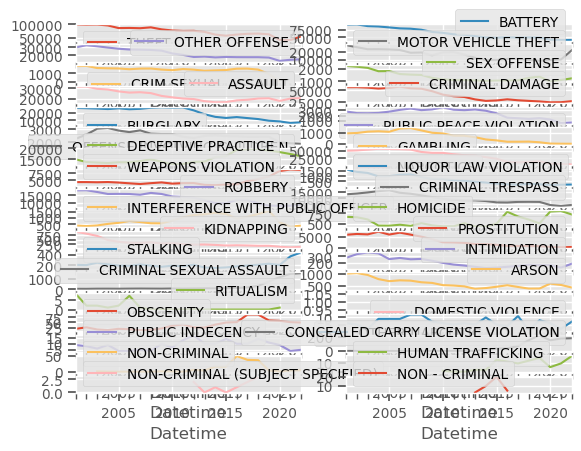

In [56]:
fig, axes = plt.subplots(nrows = 18, ncols = 2)
crimesdf.plot(subplots=True, ax=axes)

#axes.legend()
plt.tight_layout()
plt.show();

In [ ]:
#Inspect the value_counts for differnt types of crimes
ccounts= crimes.groupby('Primary Type').resample('Y').size("Count")
ccounts

In [ ]:
##Create a visualization of crime data

# Plot the data

ccrimes.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Crime Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [69]:
# Convert the index levels to datetime
crime_series.index = pd.MultiIndex.from_tuples([(pd.to_datetime(date), crime_type)
                                                for crime_type, date in crime_series.index])

# Unstack the data to create a DataFrame
crime_df = crime_series.unstack(level='Primary Type')

# Plot the data
crime_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Crime Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

NameError: name 'crime_series' is not defined

In [ ]:
## Comparing Holidays

In [ ]:
#make a date range that covers the full dataset
all_days = pd.date_range(df['Date'].min(), df['Date'].max))
all_days

In [ ]:
#create an instance of the US only holidays
us_holidays = country_holidays('US')


In [ ]:
#Get a list of all holidays
holidays = [us_holidays.get(day) for day in all_days]
holidays[:5]
            

In [ ]:
df['US Holidays']=[holidays.get(day) for day in df['Date']]
df['US Holidays'].value_counts()

In [ ]:
## Save a binary is holiday feature
df['Is_Holiday'] = df['US Holiday'].notna()
df['Is_Holiday'].value_counts()

In [ ]:
#Create list with crimes by holiday
crimes_by_holiday = df.groupby("Primary Type")['US Holidays'].value_counts().sort_index()
crimes_by_holiday

In [ ]:
crimes_by_holiday.plot()

In [ ]:
#### What are the top 3 holidays with the largest number of crimes?

In [ ]:
#### For each of the top 3 holidays with the most crime, 
#### what are the top 5 most common crimes on that holiday?